# equalizationAndSegmentation - computer vision
- Sara Echeverría 21371
- Melissa Pérez 21385
- Ricardo Mendez 21289


repository link: https://github.com/bl33h/equalizationAndSegmentation

## Task 1
Function to perform histogram equalization on an 8-bit grayscale image.

In [1]:
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

In [2]:
def histogramEqualization(image):
    # compute histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # compute cumulative distribution function (cdf)
    cdf = hist.cumsum()
    cdfNormalized = cdf * hist.max() / cdf.max()  # normalize for visualization
    
    # normalize cdf to scale between 0 and 255
    cdfMin = cdf.min()
    cdfMapped = (cdf - cdfMin) * 255 / (cdf.max() - cdfMin)
    cdfMapped = np.ma.filled(cdfMapped, 0).astype(np.uint8)  # handle zeros
    
    # map the pixels of the original image using the equalized cdf
    equalizedImg = cdfMapped[image]
    
    return equalizedImg, cdfNormalized

In [3]:
def compareHistogramEqualization(imagePath):
    """
    1. manual implementation
    2. opencv built-in function
    3. skimage built-in function
    """
    # read the image in grayscale mode
    img = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        raise ValueError("!error: image not found or not in grayscale format")
    
    # apply manual histogram equalization (pass the image instead of a path)
    manualEqualized, manualCdf = histogramEqualization(img)

    # apply opencv histogram equalization
    opencvEqualized = cv2.equalizeHist(img)

    # apply skimage histogram equalization
    skimageEqualized = exposure.equalize_hist(img)
    skimageEqualized = (skimageEqualized * 255).astype(np.uint8)

    # compute histograms
    histOriginal, bins = np.histogram(img.flatten(), 256, [0, 256])
    histManual, _ = np.histogram(manualEqualized.flatten(), 256, [0, 256])
    histOpenCV, _ = np.histogram(opencvEqualized.flatten(), 256, [0, 256])
    histSkimage, _ = np.histogram(skimageEqualized.flatten(), 256, [0, 256])

    # plot images
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 4, 1)
    plt.title("original image")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.title("manual equalized")
    plt.imshow(manualEqualized, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.title("opencv equalized")
    plt.imshow(opencvEqualized, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.title("skimage equalized")
    plt.imshow(skimageEqualized, cmap='gray')
    plt.axis('off')

    # plot histograms
    plt.subplot(2, 4, 5)
    plt.title("original histogram")
    plt.plot(histOriginal, color='black')

    plt.subplot(2, 4, 6)
    plt.title("manual histogram")
    plt.plot(histManual, color='blue')

    plt.subplot(2, 4, 7)
    plt.title("opencv histogram")
    plt.plot(histOpenCV, color='red')

    plt.subplot(2, 4, 8)
    plt.title("skimage histogram")
    plt.plot(histSkimage, color='green')

    plt.tight_layout()
    plt.show()

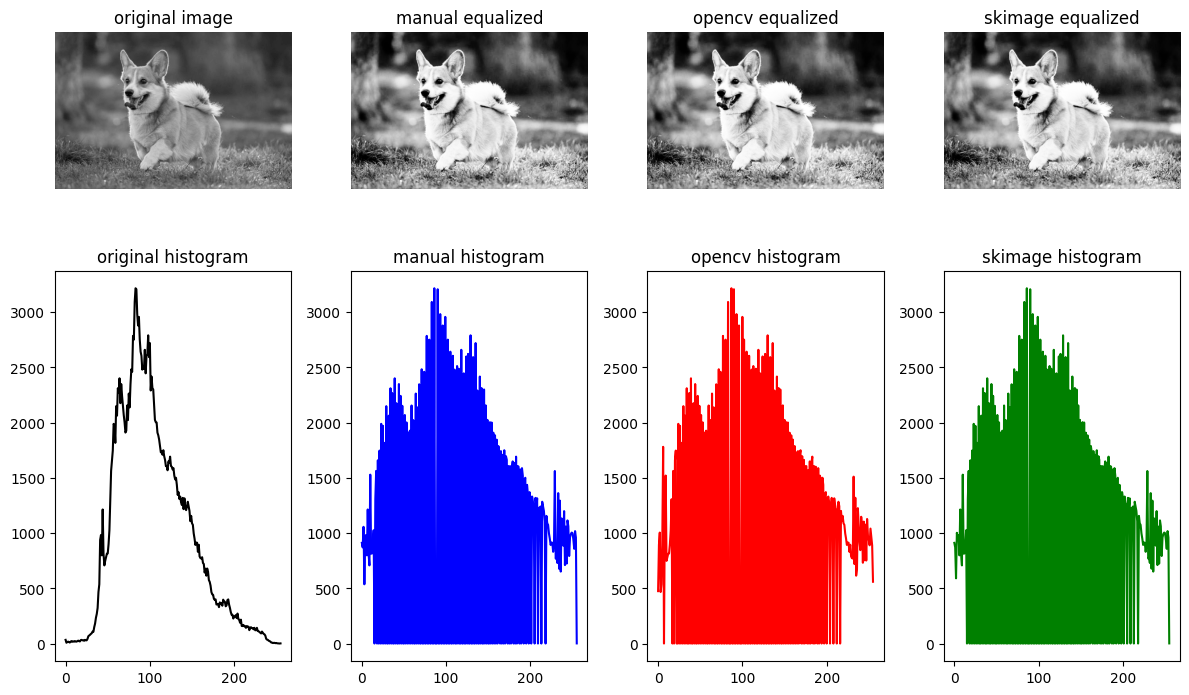

In [4]:
compareHistogramEqualization("img/dog.jpg")

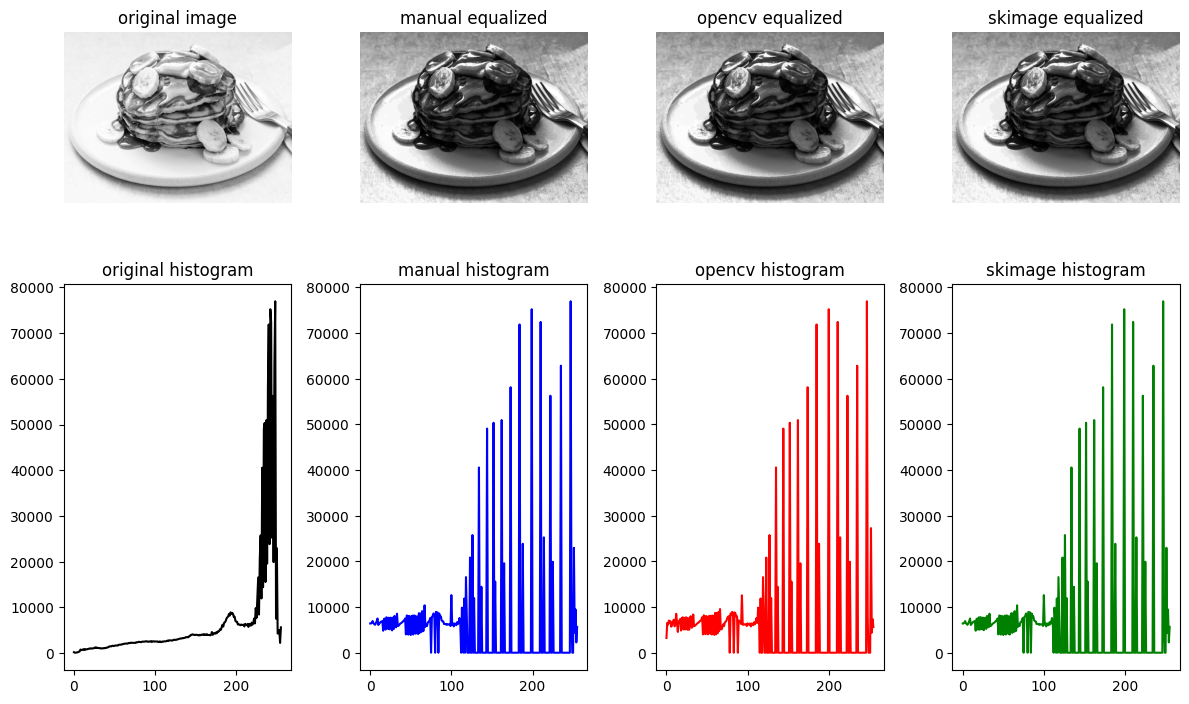

In [5]:
compareHistogramEqualization("img/pancakes.jpg")

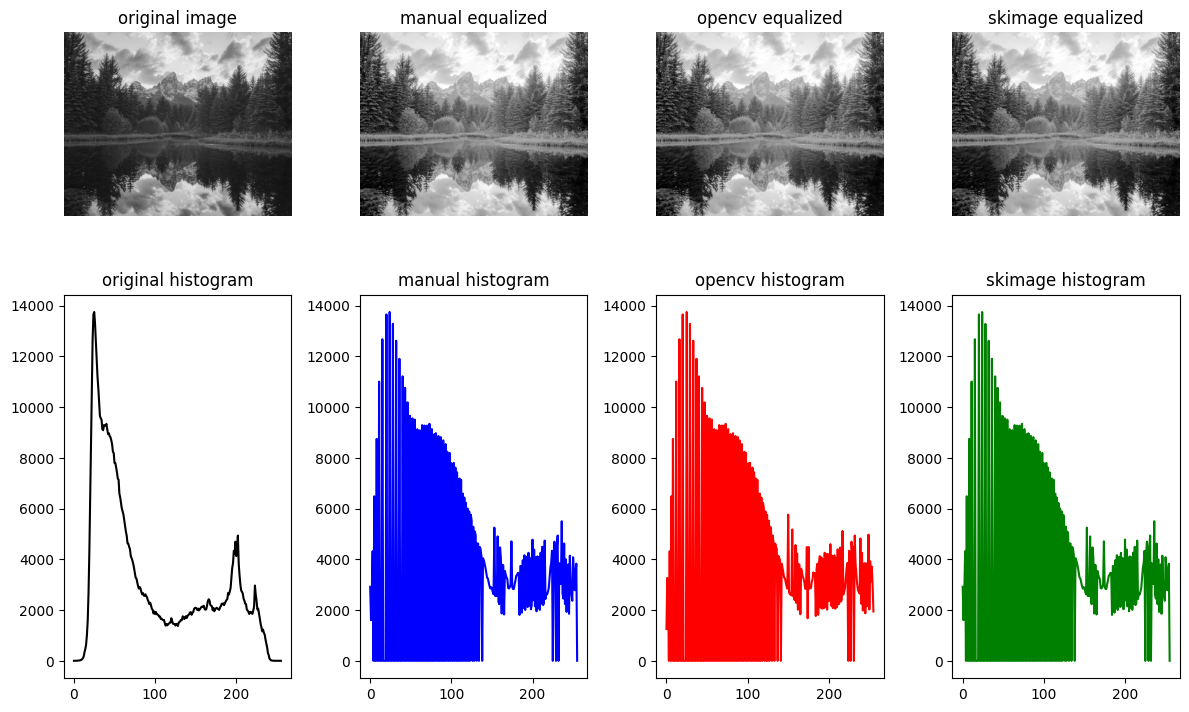

In [6]:
compareHistogramEqualization("img/landscape.jpg")

**¿Son iguales sus resultados con los de la función de Python? Explique por qué son iguales o explique por qué hay diferencias**
Como se muestra en las imágenes y gráficos anteriores, los resultados entre las tres funciones son parecidos. En la ecualización manual el histograma puede tener pequeñas variaciones, mientras que en OpenCV y Scikit-Image es más uniforme, esto se debe a que las funciones predefinidas suavizan mejor la distribución de los tonos en la imagen.

## Task 2
Binary segmentation images

In [2]:
# global thresholding
def otsu_thresholding(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary

In [3]:
# local thresholding
def adaptive_thresholding(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)
    return binary

In [14]:
# clustering
def kmeans_segmentation(image_path, k=2):
    image = cv2.imread(image_path)
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

In [15]:
def compare_segmentations(image_path):
    original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    otsu = otsu_thresholding(image_path)
    adaptive = adaptive_thresholding(image_path)
    kmeans = kmeans_segmentation(image_path)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.title("Original")
    plt.imshow(original, cmap='gray')
    plt.subplot(1, 4, 2)
    plt.title("Otsu")
    plt.imshow(otsu, cmap='gray')
    plt.subplot(1, 4, 3)
    plt.title("Adaptive")
    plt.imshow(adaptive, cmap='gray')
    plt.subplot(1, 4, 4)
    plt.title("K-Means")
    plt.imshow(cv2.cvtColor(kmeans, cv2.COLOR_BGR2RGB))
    plt.show()

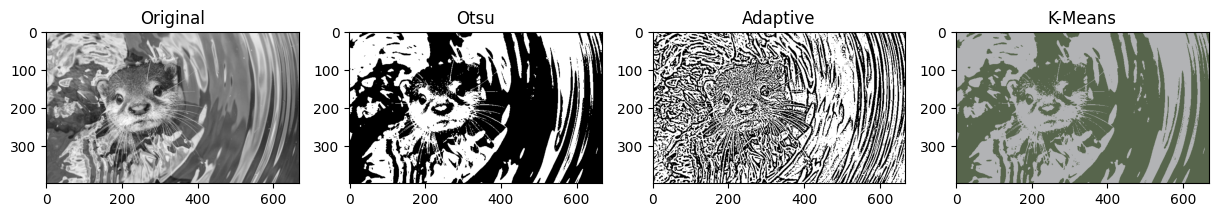

In [16]:
img1 = "img/nutria.jpg"
compare_segmentations(img1)

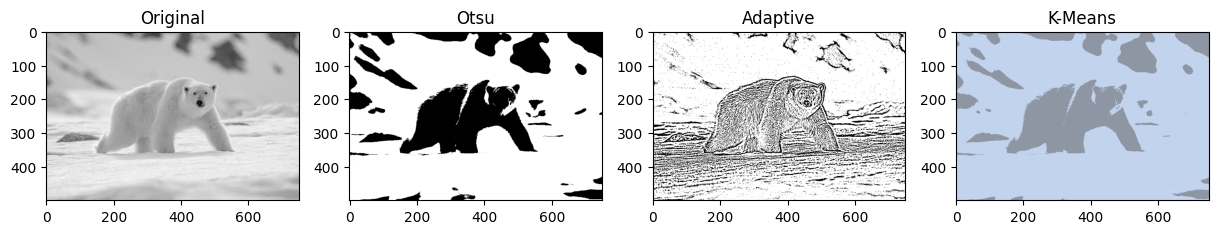

In [17]:
img2 = "img/polar.jpg"
compare_segmentations(img2)

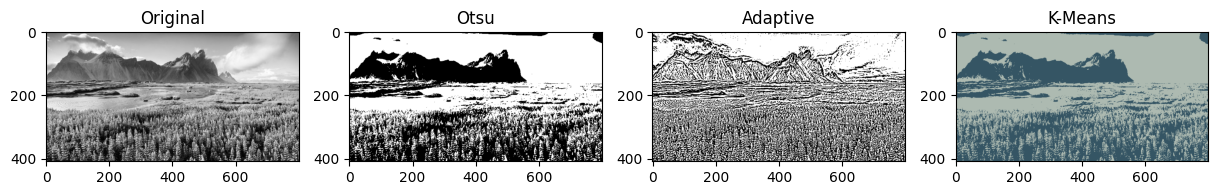

In [18]:
img3 = "img/paisaje.jpg"
compare_segmentations(img3)

### Conclusión
La elección del mejor algoritmo depende mucho de lo que se busca resaltar. 
- Otsu es útil en imágenes con buen contraste para poder separar el objeto del fondo. Su rendimiento depende de la imagen que se utilice.
- Adaptive es útil para variaciones de iluminación porque lo divide por regiones. Puede generar bastante ruido por lo que resalta más los objetos.
- K-Means genera segmentaciones generales pero no una máscara binaria precisa por su naturaleza.

Tomando las demostraciones anteriores, los mejores para resaltar los objetos han sido Otsu y K-Means. Para el futuro, podría considerarse hacer una combinación de algoritmos para obtener mejores resultados.

## Task 3

In [2]:
def kMeansSegmentation(imagePath, k):
    # load image
    image = cv2.imread(imagePath)
    if image is None:
        print("!error: could not load image")
        return

    # convert image to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # reshape image into a 2d array of pixels
    pixelValues = image.reshape((-1, 3))
    pixelValues = np.float32(pixelValues)

    # define criteria and apply k-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixelValues, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert centers to uint8 and map labels to centers
    centers = np.uint8(centers)
    segmentedImage = centers[labels.flatten()]
    segmentedImage = segmentedImage.reshape(image.shape)

    # create segment map
    labelMap = labels.reshape((image.shape[0], image.shape[1]))

    # plot results
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("original image")
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(labelMap, cmap="jet")
    plt.title("segment map")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(segmentedImage)
    plt.title("quantized image")
    plt.axis("off")

    plt.show()

**Good examples**

Para las dos imágenes se muestran los resultados con la variación en el valor "k", siendo este de 5, 15 y 25 respectivamente.

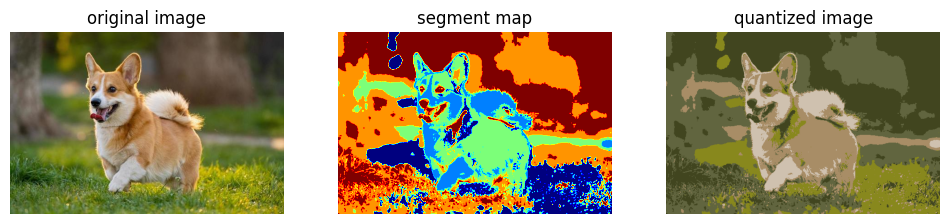

In [8]:
kMeansSegmentation("img/dog.jpg", 5)

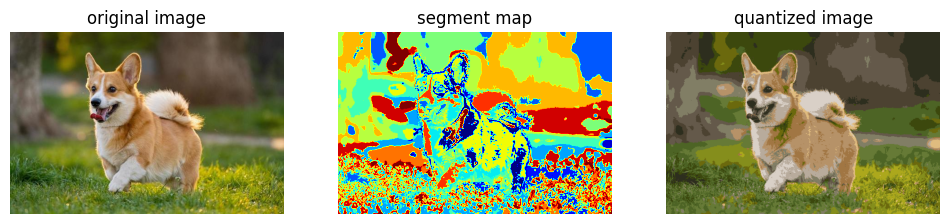

In [9]:
kMeansSegmentation("img/dog.jpg", 15)

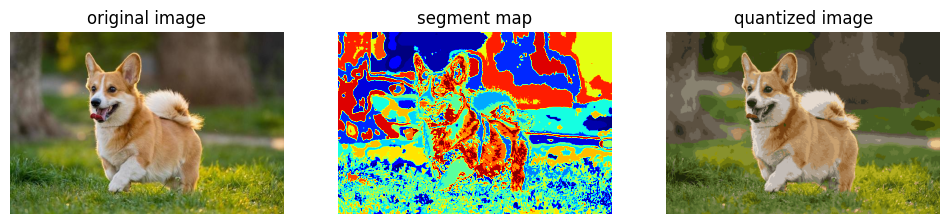

In [10]:
kMeansSegmentation("img/dog.jpg", 25)

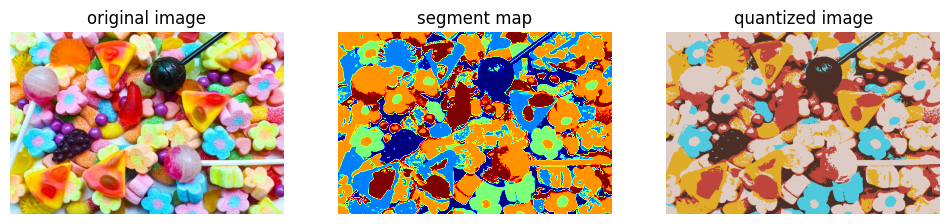

In [11]:
kMeansSegmentation("img/candy.jpg", 5)

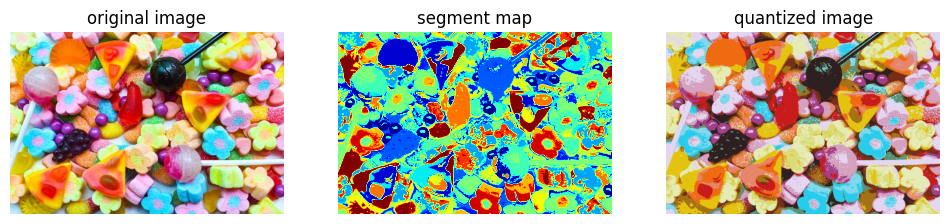

In [12]:
kMeansSegmentation("img/candy.jpg", 15)

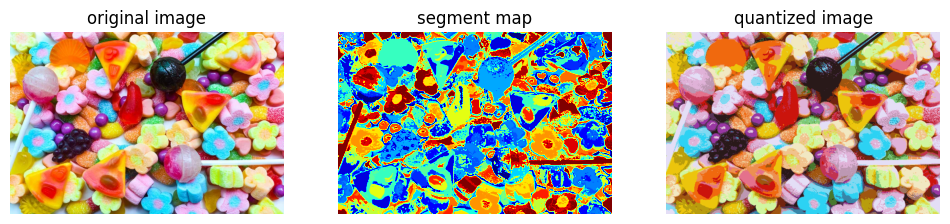

In [13]:
kMeansSegmentation("img/candy.jpg", 25)

Como se puede observar en los ejemplos anteriores, incluso con un valor de k "bajo", los elementos en cada una de las imágenes son claramente distinguibles, a pesar de que inicialmente no cuentan con una gama completa de colores. Un valor de k = 15 resulta suficiente para apreciar los detalles sin perder claridad. Esto demuestra un buen alcance en este tipo de imágenes, ya que se logra un equilibrio entre la calidad visual y la simplificación de la paleta de colores. Además, cabe destacar que el tiempo de ejecución para cada caso fue relativamente breve y la quantized image se mantiene fiel a la original.

**Bad examples**

Para las dos imágenes se muestran los resultados con la variación en el valor "k", siendo este de 5, 15 y 45 respectivamente.

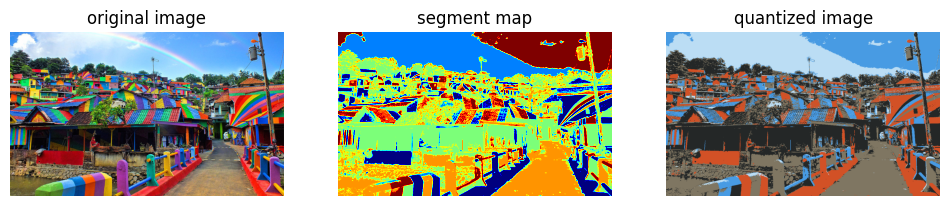

In [14]:
kMeansSegmentation("img/colorful.jpg", 5)

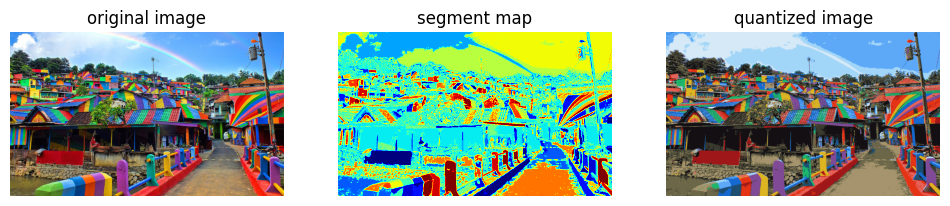

In [15]:
kMeansSegmentation("img/colorful.jpg", 15)

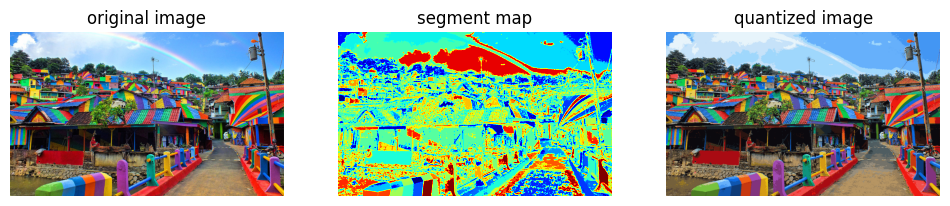

In [16]:
kMeansSegmentation("img/colorful.jpg", 45)

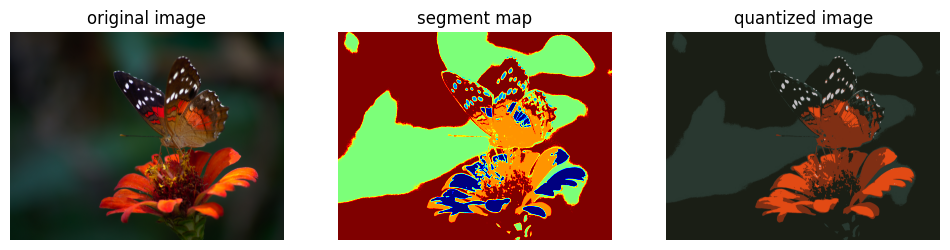

In [17]:
kMeansSegmentation("img/bf.jpg", 5)

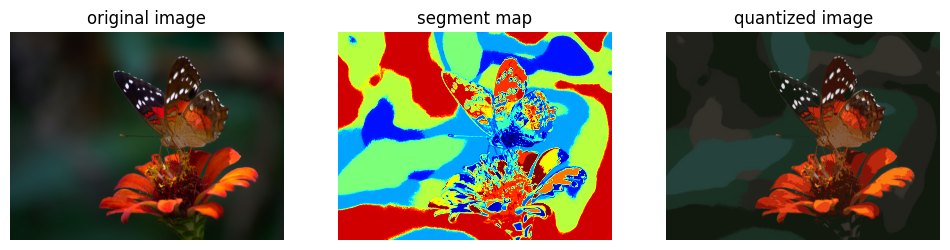

In [18]:
kMeansSegmentation("img/bf.jpg", 15)

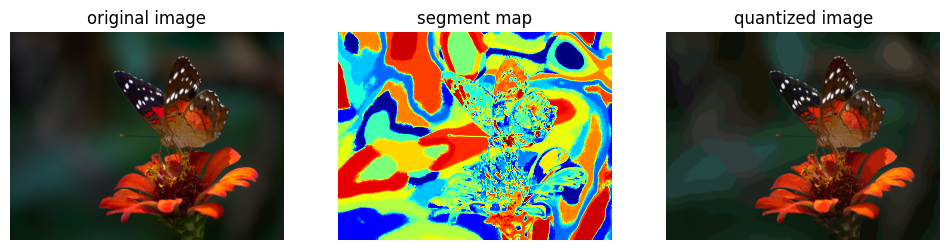

In [19]:
kMeansSegmentation("img/bf.jpg", 45)

Por otro lado, es evidente que un valor bajo de k no es suficiente para apreciar adecuadamente la imagen, ya que se pierden detalles relevantes del entorno. Por ejemplo, en la imagen de las casas (colorful.jpg), incluso con un valor de k = 45, no se logran capturar todos los detalles por completo. Esto es particularmente notable en el caso del arcoíris, cuyos colores, a pesar de haber sido segmentados, no se reflejan de manera clara. Asimismo, en la imagen de la mariposa, esta tiende a confundirse con la flor sobre la que se posa, lo que dificulta su distinción. A esto se suma que el tiempo de ejecución fue considerablemente alto, a pesar de que las resoluciones de estas imágenes son casi equivalentes a las de los "Good examples". Esto resalta las limitaciones del algoritmo, pues la quantized image no se mantiene del todo fiel a la original.

## Task 4
Color spaces

In [2]:
def color_space_hs(image, h, s, v, cr, cb):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    # Histograma del canal Hue (HSV)
    axes[0, 0].hist(h.ravel(), bins=180, color='blue', alpha=0.7)
    axes[0, 0].set_title('HSV Hue')
    axes[0, 0].set_xlabel('Pixel Value')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True)

    # Histograma del canal Saturation (HSV)
    axes[0, 1].hist(s.ravel(), bins=256, color='green', alpha=0.7)
    axes[0, 1].set_title('HSV Saturation')
    axes[0, 1].set_xlabel('Pixel Value')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True)

    # Histograma del canal Cr (YCrCb)
    axes[1, 0].hist(cr.ravel(), bins=256, color='red', alpha=0.7)
    axes[1, 0].set_title('YCrCb Cr')
    axes[1, 0].set_xlabel('Pixel Value')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].grid(True)

    # Histograma del canal Cb (YCrCb)
    axes[1, 1].hist(cb.ravel(), bins=256, color='purple', alpha=0.7)
    axes[1, 1].set_title('YCrCb Cb')
    axes[1, 1].set_xlabel('Pixel Value')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].grid(True)


    plt.tight_layout()
    plt.show()


In [3]:
def convert_and_plot_histograms(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Convertir RGB a HSV
    hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_image)
    
    # Convertir RGB a YCrCb
    ycrcb_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YCrCb)
    y, cr, cb = cv2.split(ycrcb_image)
    
    color_space_hs(image_rgb, h, s, v, cr, cb)

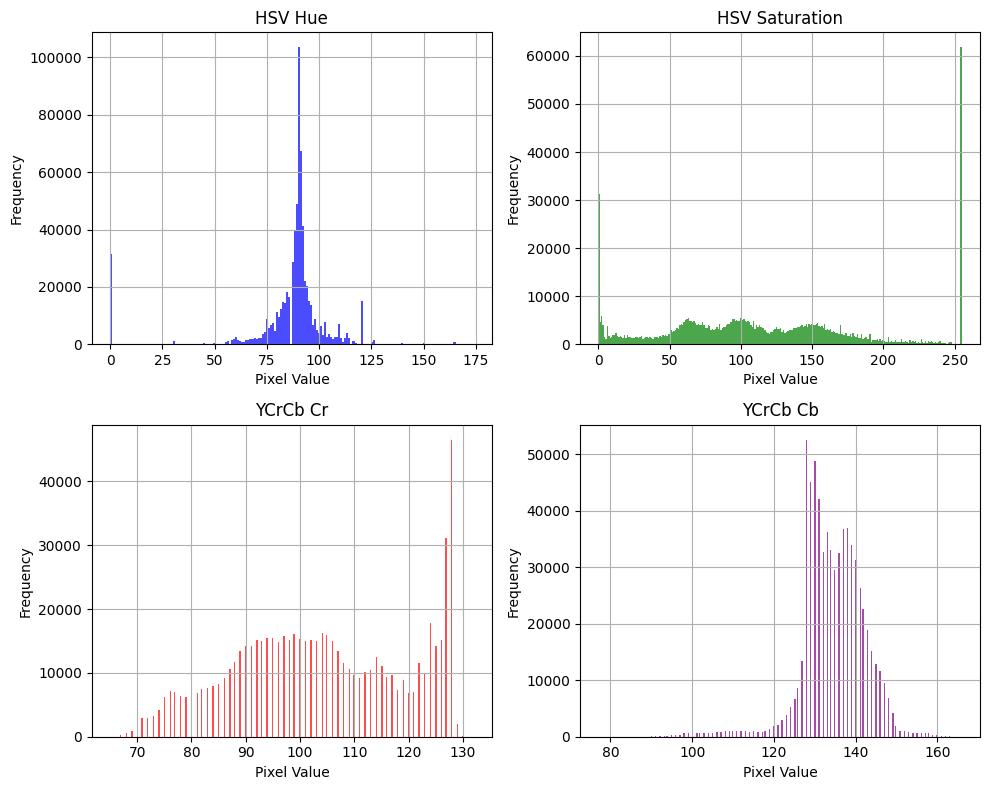

In [4]:
# coca-cola image
image_path = 'img/coca-cola.jpeg'
convert_and_plot_histograms(image_path)

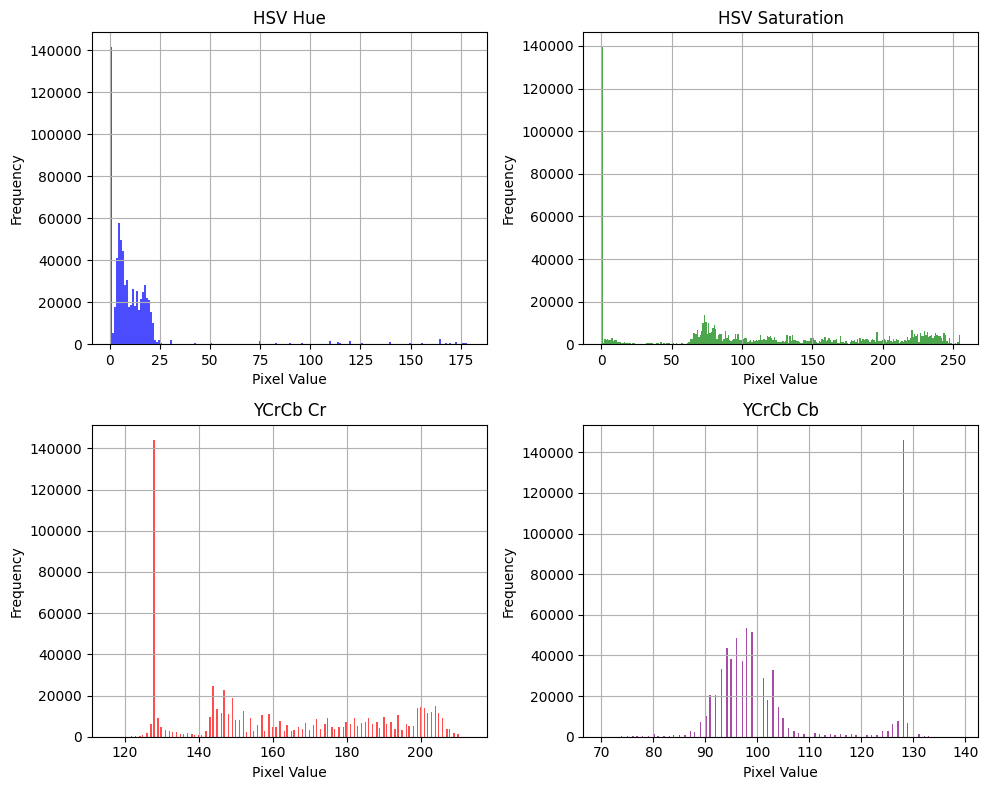

In [5]:
# pepsi image
image_path = 'img/pepsi.png'
convert_and_plot_histograms(image_path)

En la imagen coca-cola:
- Predomina el color rojo.
- Existen picos menores, lo que indica la presencia de otros colores.
- Tiene una saturación alta con colores más vibrantes.

En la imagen pepsi:
- Hay una predominancia de los colores rojos, esto se debe por el fondo de la imagen.
- Tiene menor presencia de tonos azules.
- La imagen no tiene muchos otros colores saturados, porque no hay picos en regiones de Hue.
- Son colores poco vibrantes por el nivel de saturación.

## Task 5

## Task 6